# 로지스틱 회귀 (Logistic Regression)

* 로지스틱 회귀는 이름에 회귀라는 단어가 들어가지만, 가능한 클래스가 2개인 이진 분류를 위한 모델
* 로지스틱 회귀의 예측 함수 정의

\begin{equation}
\sigma(x) = \frac{1}{1 + e^{-x}} \\
\hat{y} = \sigma(w_0 + w_1 x_1 + ... + w_p x_p)
\end{equation}

  + $\sigma$: 시그모이드 함수
  
* 로지스틱 회귀 모델은 선형 회귀 모델에 시그모이드 함수를 적용

* 로지스틱 회귀의 학습 목표는 다음과 같은 목적 함수를 최소화 하는 파라미터 $w$를 찾는 것

\begin{equation}
BinaryCrossEntropy = -\frac{1}{N}\sum_{i=1}^{N}y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)
\end{equation}

## 로지스틱 회귀 예제

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use(['seaborn-whitegrid'])

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

In [4]:
samples = 1000
X, y = make_classification(n_samples=samples, n_features=2, 
                           n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1)

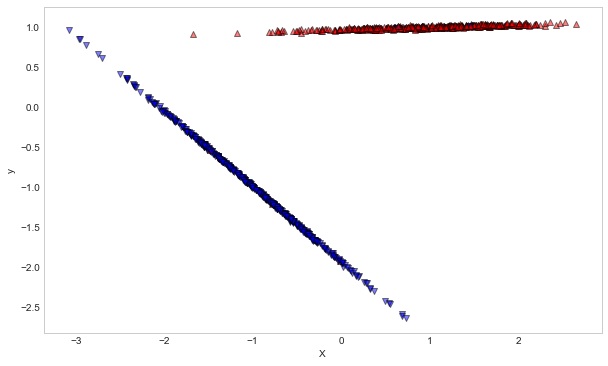

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.grid()
ax.set_xlabel('X')
ax.set_ylabel('y')

for i in range(samples):
    if y[i] == 0:
        ax.scatter(X[i, 0], X[i, 1], edgecolors='k', 
                   alpha=0.5, marker='^', color='r')
    else:
        ax.scatter(X[i, 0], X[i, 1], edgecolors='k',
                   alpha=0.5, marker='v', color='b')
        
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [9]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.995
평가 데이터 점수: 0.995


In [10]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv=10)
print("CV 평균 점수: {}".format(scores.mean()))

CV 평균 점수: 0.994


In [11]:
model.intercept_, model.coef_

(array([-0.37527561]), array([[-1.89862722, -3.20934078]]))

<ipython-input-12-3d2212a499a7>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)


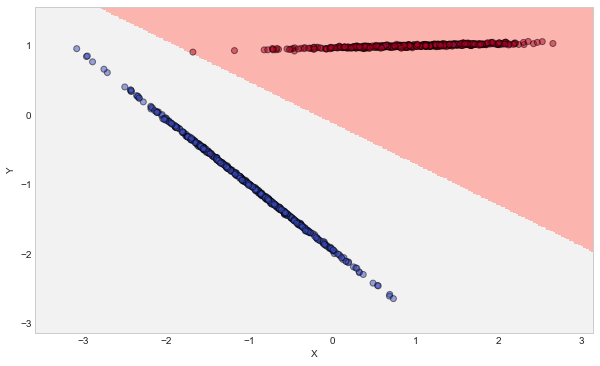

In [12]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)

plt.scatter(X[:, 0], X[:, 1], c=np.abs(y-1), 
            edgecolors='k', alpha=0.5, cmap=plt.cm.coolwarm)
plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.yticks()

plt.show()


## 붓꽃 데이터

![iris.png](https://drive.google.com/uc?id=1M-rZSCsgOylvAq82HwPdmn2MikZeDQ9a)

In [17]:
from sklearn.datasets import load_iris 

iris = load_iris()
print(iris.keys())
print(iris.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1

In [20]:
import pandas as pd
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
species = pd.Series(iris.target, dtype='category')
sepcies = species.cat.rename_categories(iris.target_names)
iris_df['species'] = species
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [21]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


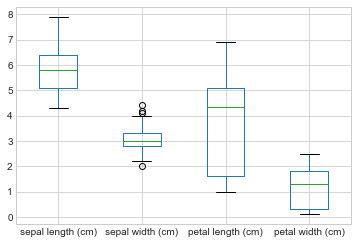

In [23]:
iris_df.boxplot();

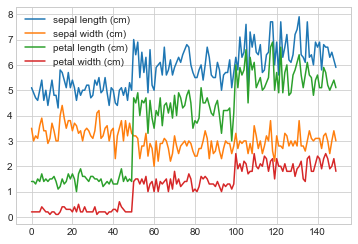

In [24]:
iris_df.plot();

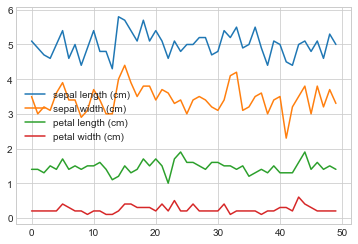

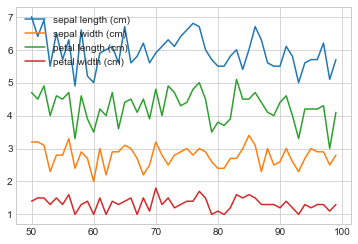

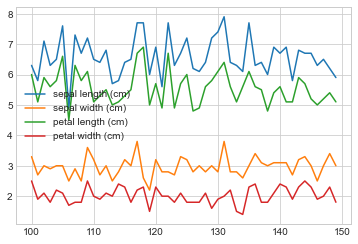

In [25]:
iris_df.groupby('species').plot();

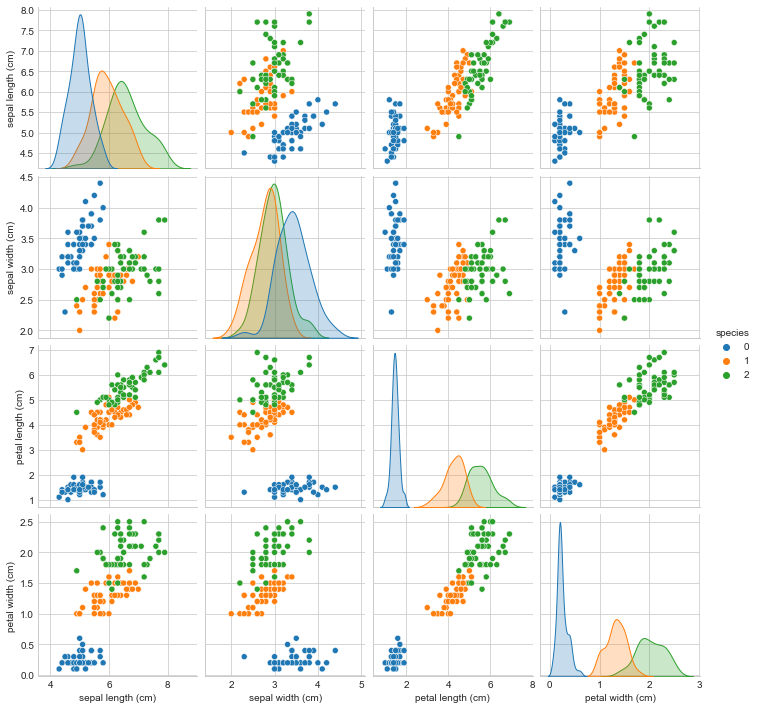

In [26]:
import seaborn as sns
sns.pairplot(iris_df, hue='species');

## 붓꽃 데이터에 대한 로지스틱 회귀

In [37]:
from sklearn.model_selection import train_test_split

# stratify=iris.target 을 해준 이유는 나눌때 계층의 숫자에도 유의
X_train, X_test, y_train, y_test = train_test_split(iris.data[:, [2,3]], iris.target, 
                                                    test_size=0.2, random_state=1, 
                                                    stratify=iris.target)



In [45]:
# 계층에 맞게 잘 나누어 져 있는지 확인하기 위해서 
for i in range(3):
    print((y_train==i).sum())

40
40
40


In [41]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(solver='lbfgs', multi_class='auto', 
                         C = 100.0, random_state = 1)

model.fit(X_train, y_train)

LogisticRegression(C=100.0, random_state=1)

In [42]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9666666666666667
평가 데이터 점수: 0.9666666666666667


In [52]:
import numpy as np

X = np.vstack((X_train, X_test))
y = np.hstack((y_train, y_test))

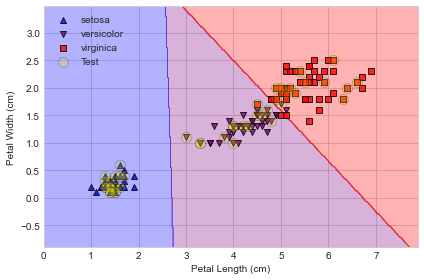

In [64]:
from matplotlib.colors import ListedColormap

x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), 
                       np.arange(x2_min, x2_max, 0.02))

Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

species = iris.target_names
markers = ('^','v','s')
colors = ('blue', 'purple', 'red')
cmap = ListedColormap(colors[:len(np.unique(y))])
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl, 0], y=X[y==cl,1],
                alpha = 0.8, c = colors[idx],
                marker = markers[idx], label=species[cl], 
                edgecolor='k')
    
X_comb_test, y_comb_test = X[range(105, 150), :], y[range(105, 150)]
plt.scatter(X_comb_test[:, 0], X_comb_test[:, 1],
            c = 'yellow', edgecolor='k', alpha=0.2,
            linewidth=1, marker='o',
            s=100, label='Test')


plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
# plt.xlim(0,8)
# plt.ylim(0,4)
plt.legend(loc = 'upper left')
plt.tight_layout();

In [80]:
import multiprocessing
from sklearn.model_selection import GridSearchCV

param_grid = [{'penalty': ['l1','l2'],
               'C':[2.0, 2.2, 2.4, 2.6, 2.8]}]

gs = GridSearchCV(estimator=LogisticRegression(), 
                  param_grid=param_grid,
                  scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

gs

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=12,
             param_grid=[{'C': [2.0, 2.2, 2.4, 2.6, 2.8],
                          'penalty': ['l1', 'l2']}],
             scoring='accuracy')

In [81]:
LogisticRegression()

LogisticRegression()

In [82]:
result = gs.fit(iris.data, iris.target)

C:\Users\bigne\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [83]:
print(gs.best_estimator_)
print("최적 점수: {}".format(gs.best_score_))
print("최적 파라미터: {}".format(gs.best_params_))
pd.DataFrame(result.cv_results_)

LogisticRegression(C=2.4)
최적 점수: 0.9800000000000001
최적 파라미터: {'C': 2.4, 'penalty': 'l2'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000200,0.000400,0.0000,0.00000,2,l1,"{'C': 2.0, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,0.031407,0.001802,0.0004,0.00049,2,l2,"{'C': 2.0, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
2,0.000296,0.000452,0.0000,0.00000,2.2,l1,"{'C': 2.2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
3,0.028325,0.001954,0.0005,0.00050,2.2,l2,"{'C': 2.2, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
4,0.000000,0.000000,0.0000,0.00000,2.4,l1,"{'C': 2.4, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
5,0.027725,0.003929,0.0002,0.00040,2.4,l2,"{'C': 2.4, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
6,0.000100,0.000300,0.0000,0.00000,2.6,l1,"{'C': 2.6, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
7,0.025323,0.002833,0.0005,0.00050,2.6,l2,"{'C': 2.6, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
8,0.000100,0.000300,0.0000,0.00000,2.8,l1,"{'C': 2.8, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
9,0.024523,0.003077,0.0002,0.00040,2.8,l2,"{'C': 2.8, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1


## 유방암 데이터

In [90]:
from sklearn.datasets import load_breast_cancer

cancer= load_breast_cancer()
print(cancer.keys())
print(cancer.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were c

In [91]:
import pandas as pd

cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df['target'] = pd.Series(cancer.target)
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [96]:
cancer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


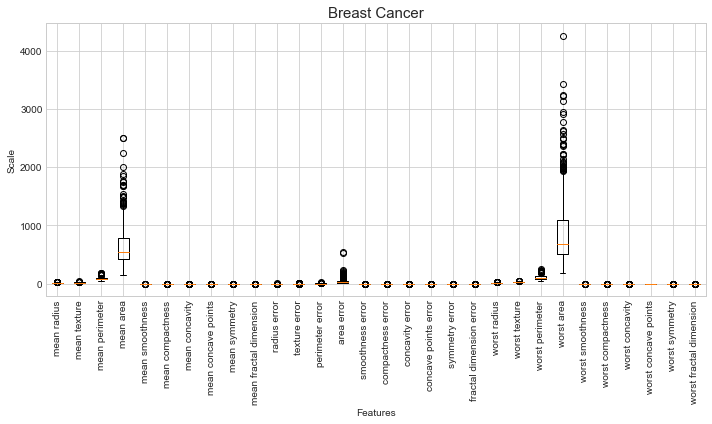

In [95]:
fig = plt.figure(figsize=[10, 6])
plt.title('Breast Cancer', fontsize=15)
plt.boxplot(cancer.data)
plt.xticks(np.arange(30)+1, cancer.feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Scale')
plt.tight_layout()

## 유방암 데이터에 대한 로지스틱 회귀

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [98]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [99]:
model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [102]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 3000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [100]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))


학습 데이터 점수: 0.9671361502347418
평가 데이터 점수: 0.958041958041958


# 확률적 경사 하강법 (Stochastic Gradient Descent)

* 모델을 학습 시키기 위한 간단한 방법
* 학습 파라미터에 대한 손실 함수의 기울기를 구해 기울기가 최소화 되는 방향으로 학습

\begin{equation}
\frac{\partial L}{\partial w} = \underset{h \rightarrow 0}{lim} \frac{L(w+h) - L(w)}{h} \\
w^{'} = w - \alpha \frac{\partial L}{\partial w}
\end{equation}

* scikit-learn에서는 선형 SGD 회귀와 SGD 분류를 지원

## SGD를 사용한 선형 회귀 분석

In [103]:
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [104]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [106]:
model = make_pipeline(StandardScaler(), SGDRegressor(loss='squared_loss'))
model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [107]:
model.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('sgdregressor', SGDRegressor())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'sgdregressor': SGDRegressor(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'sgdregressor__alpha': 0.0001,
 'sgdregressor__average': False,
 'sgdregressor__early_stopping': False,
 'sgdregressor__epsilon': 0.1,
 'sgdregressor__eta0': 0.01,
 'sgdregressor__fit_intercept': True,
 'sgdregressor__l1_ratio': 0.15,
 'sgdregressor__learning_rate': 'invscaling',
 'sgdregressor__loss': 'squared_loss',
 'sgdregressor__max_iter': 1000,
 'sgdregressor__n_iter_no_change': 5,
 'sgdregressor__penalty': 'l2',
 'sgdregressor__power_t': 0.25,
 'sgdregressor__random_state': None,
 'sgdregressor__shuffle': True,
 'sgdregressor__tol': 0.001,
 'sgdregressor__validation_fraction': 0.1,
 'sgdregressor__verbose': 0,
 'sgdregressor__warm_start': False}

In [109]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.7774629910314987
평가 데이터 점수: 0.630586433821194


## 붓꽃 데이터에 대한 SGD 분류

In [111]:
from sklearn.linear_model import SGDClassifier # 분류용
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [112]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [113]:
model = make_pipeline(StandardScaler(), SGDClassifier(loss='log')) # loss='hinge' 인 default 값은 SVM 입니다.
model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(loss='log'))])

In [114]:
model.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('sgdclassifier', SGDClassifier(loss='log'))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'sgdclassifier': SGDClassifier(loss='log'),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'sgdclassifier__alpha': 0.0001,
 'sgdclassifier__average': False,
 'sgdclassifier__class_weight': None,
 'sgdclassifier__early_stopping': False,
 'sgdclassifier__epsilon': 0.1,
 'sgdclassifier__eta0': 0.0,
 'sgdclassifier__fit_intercept': True,
 'sgdclassifier__l1_ratio': 0.15,
 'sgdclassifier__learning_rate': 'optimal',
 'sgdclassifier__loss': 'log',
 'sgdclassifier__max_iter': 1000,
 'sgdclassifier__n_iter_no_change': 5,
 'sgdclassifier__n_jobs': None,
 'sgdclassifier__penalty': 'l2',
 'sgdclassifier__power_t': 0.5,
 'sgdclassifier__random_state': None,
 'sgdclassifier__shuffle': True,
 'sgdclassifier__tol': 0.001,
 'sgdclassifier__validation_fraction': 0.1,
 'sgdclassif

In [115]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))


학습 데이터 점수: 0.9196428571428571
평가 데이터 점수: 0.8947368421052632


## 유방암 데이터에 대한 SGD 분류

In [116]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [117]:
model = make_pipeline(StandardScaler(), SGDClassifier(loss='log'))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(loss='log'))])

In [118]:
model.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('sgdclassifier', SGDClassifier(loss='log'))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'sgdclassifier': SGDClassifier(loss='log'),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'sgdclassifier__alpha': 0.0001,
 'sgdclassifier__average': False,
 'sgdclassifier__class_weight': None,
 'sgdclassifier__early_stopping': False,
 'sgdclassifier__epsilon': 0.1,
 'sgdclassifier__eta0': 0.0,
 'sgdclassifier__fit_intercept': True,
 'sgdclassifier__l1_ratio': 0.15,
 'sgdclassifier__learning_rate': 'optimal',
 'sgdclassifier__loss': 'log',
 'sgdclassifier__max_iter': 1000,
 'sgdclassifier__n_iter_no_change': 5,
 'sgdclassifier__n_jobs': None,
 'sgdclassifier__penalty': 'l2',
 'sgdclassifier__power_t': 0.5,
 'sgdclassifier__random_state': None,
 'sgdclassifier__shuffle': True,
 'sgdclassifier__tol': 0.001,
 'sgdclassifier__validation_fraction': 0.1,
 'sgdclassif

In [119]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))


학습 데이터 점수: 0.9859154929577465
평가 데이터 점수: 0.965034965034965
